In [1]:
import mokapot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats

Reading in the megascript and reformatting it

In [2]:
#read in the megaScript and reformat it
def clean_meagScript(file):
    df = pd.read_csv(file, low_memory=False,  header=[0,1])
    df.drop(columns = {"Unnamed: 0_level_0"})
    return df

Slicing out the MokaPot qvalues for MsFragger. Counting how many are at or under the cutoff

In [3]:
def get_msf_Qval_len(df, cutoff):
    msf_probability = df["MsFragger"]['mokapot q-value']
    msf_probability =  msf_probability.dropna()
    msf_under_cutoff = len(msf_probability.loc[msf_probability <= cutoff])
    return msf_under_cutoff

Slicing out the MokaPot qvalues for each tool and counting how many are at or under the cutoff

In [4]:
def get_mm_Qval_len(df, cutoff):
    mm_qval = df["MetaMorpheus"]['mokapot q-value'] 
    mm_qval =  mm_qval.dropna() 
    mm_under_cutoff = len(mm_qval.loc[mm_qval <= cutoff])
    #print(mm_qval.loc[mm_qval <= 0.01])
    return mm_under_cutoff

In [5]:
def get_msg_Qval_len(df, cutoff):
    msg_qval = df["MsgfPlus"]['mokapot q-value'] 
    msg_qval =  msg_qval.dropna() 
    msg_under_cutoff = len(msg_qval.loc[msg_qval <= cutoff])
    return msg_under_cutoff

In [6]:
def get_mq_Qval_len(df, cutoff):
    mq_PEP = df["MaxQuant"]['mokapot q-value'] 
    mq_PEP =  mq_PEP.dropna() 
    mq_under_cutoff = len(mq_PEP.loc[mq_PEP <= cutoff])
    return mq_under_cutoff

In [7]:
def get_pd_Qval_len(df, cutoff):
    pd_qval = df["Proteome_Discoverer"]['Percolator q-Value'] 
    pd_qval = pd_qval.dropna()
    pd_under_cutoff = len(pd_qval.loc[pd_qval <= cutoff])
    return pd_under_cutoff

In [8]:
def get_file_values(file, cutoff):
    df = clean_meagScript(file)
    msf_QVal = get_msf_Qval_len(df, cutoff)
    MM_QVal = get_mm_Qval_len(df, cutoff)
    msg_QVal = get_msg_Qval_len(df, cutoff)
    MQ_Qval = get_mq_Qval_len(df, cutoff)
    pd_Qval = get_pd_Qval_len(df, cutoff)
    values_list = {"msf_QVal" : msf_QVal, "MM_QVal" : MM_QVal, "msg_QVal" : msg_QVal, "MQ_Qval" : MQ_Qval, "pd_Qval" : pd_Qval}
    return values_list

Reading in the data and making the graph for the 2ng data

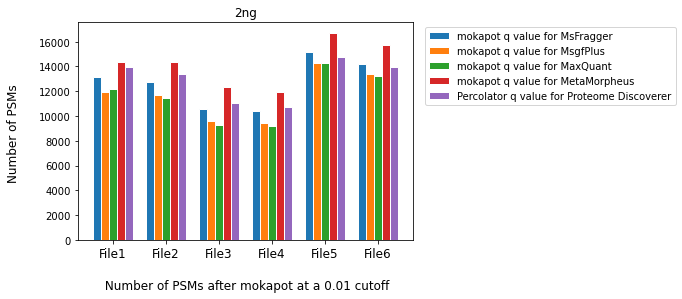

In [46]:
File1 = get_file_values("MokaPot/MegaScript_2ng_rep1.csv", 0.01)
File2 = get_file_values("MokaPot/MegaScript_2ng_rep2.csv", 0.01)
File3 = get_file_values("MokaPot/MegaScript_2ng_rep3.csv", 0.01)
File4 = get_file_values("MokaPot/MegaScript_2ng_rep4.csv", 0.01)
File5 = get_file_values("MokaPot/MegaScript_2ng_rep5.csv", 0.01)
File6 = get_file_values("MokaPot/MegaScript_2ng_rep6.csv", 0.01)

 
# set width of bars
barWidth = 0.15
 
# set heights of bars
msf_qval_2ng = [File1['msf_QVal'], File2['msf_QVal'], File3['msf_QVal'], File4['msf_QVal'], File5['msf_QVal'], File6['msf_QVal']]
MM_qval_2ng = [File1['MM_QVal'], File2['MM_QVal'], File3['MM_QVal'], File4['MM_QVal'], File5['MM_QVal'], File6['MM_QVal']]
msg_qval_2ng = [File1['msg_QVal'], File2['msg_QVal'], File3['msg_QVal'], File4['msg_QVal'], File5['msg_QVal'], File6['msg_QVal']]
mq_qval_2ng = [File1['MQ_Qval'], File2['MQ_Qval'], File3['MQ_Qval'], File4['MQ_Qval'], File5['MQ_Qval'], File6['MQ_Qval']]
pd_qval_2ng = [File1['pd_Qval'], File2['pd_Qval'], File3['pd_Qval'], File4['pd_Qval'], File5['pd_Qval'], File6['pd_Qval']]
  
# Set position of bar on X axis
r1 = np.arange(len(msf_qval_2ng))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, msf_qval_2ng, width=barWidth, edgecolor='white', label='mokapot q value for MsFragger')
plt.bar(r2, msg_qval_2ng, width=barWidth, edgecolor='white', label='mokapot q value for MsgfPlus')
plt.bar(r3, mq_qval_2ng, width=barWidth, edgecolor='white', label='mokapot q value for MaxQuant')
plt.bar(r4, MM_qval_2ng, width=barWidth, edgecolor='white', label='mokapot q value for MetaMorpheus')
plt.bar(r5, pd_qval_2ng, width=barWidth, edgecolor='white', label='Percolator q value for Proteome Discoverer')
 
# Add xticks on the middle of the group bars
plt.ylabel('Number of PSMs \n', size = 12)
plt.xlabel('\n Number of PSMs after mokapot at a 0.01 cutoff', size = 12)
plt.title('2ng', size = 12)
plt.xticks([r + barWidth + 0.15 for r in range(len(msf_qval_2ng))], ['File1', 'File2', 'File3', 'File4', 'File5', 'File6'], size = 12)
 
# Create legend & Show graphic
plt.legend(loc = "upper right", bbox_to_anchor=(1.8, 1))
figure2_1 = plt.gcf()
figure2_1.savefig('2ng_PSM_after_MP.png', dpi=300, bbox_inches='tight')
plt.show()

This graph shows the number of PSMs with a MokaPot qvalue  at or below a specific cutoff after a tool's output has been ran through MokaPot. This showcases the data for the 2ng files. 

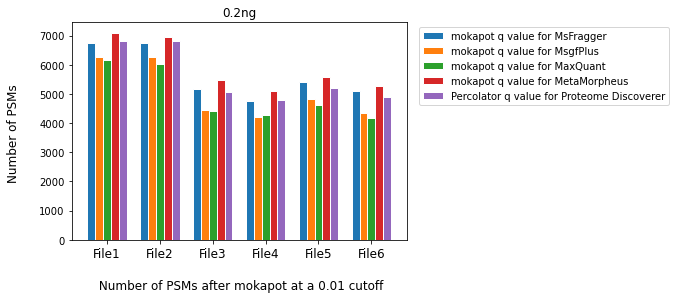

In [45]:
File7 = get_file_values("MokaPot/MegaScript_0.2ng_rep1.csv", 0.01)
File8 = get_file_values("MokaPot/MegaScript_0.2ng_rep2.csv", 0.01)
File9 = get_file_values("MokaPot/MegaScript_0.2ng_rep3.csv", 0.01)
File10 = get_file_values("MokaPot/MegaScript_0.2ng_rep4.csv", 0.01)
File11 = get_file_values("MokaPot/MegaScript_0.2ng_rep5.csv", 0.01)
File12 = get_file_values("MokaPot/MegaScript_0.2ng_rep6.csv", 0.01)

 
# set width of bars
barWidth = 0.15
 
# set heights of bars
msf_qval_02ng = [File7['msf_QVal'], File8['msf_QVal'], File9['msf_QVal'], File10['msf_QVal'], File11['msf_QVal'], File12['msf_QVal']]
MM_qval_02ng = [File7['MM_QVal'], File8['MM_QVal'], File9['MM_QVal'], File10['MM_QVal'], File11['MM_QVal'], File12['MM_QVal']]
msg_qval_02ng = [File7['msg_QVal'], File8['msg_QVal'], File9['msg_QVal'], File10['msg_QVal'], File11['msg_QVal'], File12['msg_QVal']]
mq_qval_02ng = [File7['MQ_Qval'], File8['MQ_Qval'], File9['MQ_Qval'], File10['MQ_Qval'], File11['MQ_Qval'], File12['MQ_Qval']]
pd_qval_02ng = [File7['pd_Qval'], File8['pd_Qval'], File9['pd_Qval'], File10['pd_Qval'], File11['pd_Qval'], File12['pd_Qval']]
    
# Set position of bar on X axis
r1 = np.arange(len(msf_qval_02ng))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, msf_qval_02ng, width=barWidth, edgecolor='white', label='mokapot q value for MsFragger')
plt.bar(r2, msg_qval_02ng, width=barWidth, edgecolor='white', label='mokapot q value for MsgfPlus')
plt.bar(r3, mq_qval_02ng, width=barWidth, edgecolor='white', label='mokapot q value for MaxQuant')
plt.bar(r4, MM_qval_02ng, width=barWidth, edgecolor='white', label='mokapot q value for MetaMorpheus')
plt.bar(r5, pd_qval_02ng, width=barWidth, edgecolor='white', label='Percolator q value for Proteome Discoverer')

 
# Add xticks on the middle of the group bars
plt.ylabel('Number of PSMs \n', size = 12)
plt.xlabel('\n Number of PSMs after mokapot at a 0.01 cutoff', size = 12)
plt.title('0.2ng', size = 12)
plt.xticks([r + barWidth + 0.15 for r in range(len(msf_qval_02ng))], ['File1', 'File2', 'File3', 'File4', 'File5', 'File6'], size = 12)
 
# Create legend & Show graphic
plt.legend(loc = "upper right", bbox_to_anchor=(1.8, 1))
figure2_2 = plt.gcf()
figure2_2.savefig('0.2ng_PSM_after_MP.png', dpi=300, bbox_inches='tight')
plt.show()

This graph shows the number of PSMs with a MokaPot qvalue  at or below a specific cutoff after a tool's output has been ran through MokaPot. Proteome Discoverer automatically runs its data through Percolator, so it's output is the percolator q value. 
This showcases the data for the 0.2ng files.

# Calculating the perfect differences between MetaMorpheus, the highest scorer, and all the other tools

Calculating the percent differnce between MetaMorpheus and MSGF+ mokapot q-value scores for 2ng data

In [12]:
diff_msgf = []
for i, count in enumerate(msg_qval_2ng) :
    meta_morpheus_count = MM_qval_2ng[i]
    var = (meta_morpheus_count - count) / meta_morpheus_count
    diff_msgf.append(var)
#now avg difference
diff_msgf_average = stats.mean(diff_msgf)
diff_msgf_average

0.1801535931878448

Calculating the percent differnce between MetaMorpheus and MsFragger mokapot q-value scores for 2ng data

In [13]:
diff_msfrag = []
for i, count in enumerate(msf_qval_2ng) :
    meta_morpheus_count = MM_qval_2ng[i]
    var = (meta_morpheus_count - count) / meta_morpheus_count
    diff_msfrag.append(var)
#now avg difference
diff_msfrag_average = stats.mean(diff_msfrag)
diff_msfrag_average

0.11026397095009602

Calculating the percent differnce between MetaMorpheus and Maxquant mokapot q-value scores for 2ng data

In [14]:
diff_mq = []
for i, count in enumerate(mq_qval_2ng) :
    meta_morpheus_count = MM_qval_2ng[i]
    var = (meta_morpheus_count - count) / meta_morpheus_count
    diff_mq.append(var)
#now avg difference
diff_mq_average = stats.mean(diff_mq)
diff_mq_average

0.19076338921173744

Calculating the percent differnce between MetaMorpheus mokapot q-value scores and Proteome Discoverer's percolator q-value scores for 2ng data

In [15]:
diff_pd = []
for i, count in enumerate(pd_qval_2ng) :
    meta_morpheus_count = MM_qval_2ng[i]
    var = (meta_morpheus_count - count) / meta_morpheus_count
    diff_mq.append(var)
#now avg difference
diff_pd_average = stats.mean(diff_mq)
diff_pd_average

0.13998118241570598

Calculating the percent differnce between MetaMorpheus and MSGF+ mokapot q-value scores for 0.2ng data

In [16]:
diff_msgf = []
for i, count in enumerate(msg_qval_02ng) :
    meta_morpheus_count = MM_qval_02ng[i]
    var = (meta_morpheus_count - count) / meta_morpheus_count
    diff_msgf.append(var)
#now avg difference
diff_msgf_average = stats.mean(diff_msgf)
diff_msgf_average

0.14761121191476012

Calculating the percent differnce between MetaMorpheus and MsFragger mokapot q-value scores for 0.2ng data

In [17]:
diff_msfrag = []
for i, count in enumerate(msf_qval_02ng) :
    meta_morpheus_count = MM_qval_02ng[i]
    var = (meta_morpheus_count - count) / meta_morpheus_count
    diff_msfrag.append(var)
#now avg difference
diff_msfrag_average = stats.mean(diff_msfrag)
diff_msfrag_average

0.043400335672144984

Calculating the percent differnce between MetaMorpheus and Maxquant q-value scores for 0.2ng data

In [18]:
diff_mq = []
for i, count in enumerate(mq_qval_02ng) :
    meta_morpheus_count = MM_qval_02ng[i]
    var = (meta_morpheus_count - count) / meta_morpheus_count
    diff_mq.append(var)
#now avg difference
diff_mq_average = stats.mean(diff_mq)
diff_mq_average

0.16581479709140798

Calculating the percent differnce between MetaMorpheus mokapot q-value scores and Proteome Discoverer's percolator q-value scores for 0.2ng data

In [19]:
diff_pd = []
for i, count in enumerate(pd_qval_02ng) :
    meta_morpheus_count = MM_qval_02ng[i]
    var = (meta_morpheus_count - count) / meta_morpheus_count
    diff_mq.append(var)
#now avg difference
diff_pd_average = stats.mean(diff_mq)
diff_pd_average

0.11094513393086841